#**Experimento com Redes Neurais MLP**

Importação do Keras
*  Sequential
*   InputLayer,
*    Dense - Estrutura de rede totalmente conectada
*   SGD
*   [R2 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
*   [Mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)




In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
from keras.models  import Sequential
from keras.layers import InputLayer, Dense
from tensorflow import keras
from sklearn.metrics import r2_score, median_absolute_error
from keras.optimizers import adam_v2
from google.colab import files

### **Carregando as bases de treinamento**

In [ ]:
#Base de treinamento normalizada, sem a variável alvo
url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/BasesTratadas/HousePred_Train.csv'
X_train = pd.read_csv(url)

#Variável alvo da base de treinamente, não normalizada
url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/BasesTratadas/SalePrice_Train.csv'
y_train = pd.read_csv(url)

#Variável alvo da base de treinamento, com transformação logarítimica, não normalizada
url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/BasesTratadas/SalePrice_Train_log.csv'
y_train_log = pd.read_csv(url)

###**Carregando as bases de testes**

In [ ]:
#Base de treinamento para testes, sem a variável alvo, normalizada
url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/BasesTratadas/HousePred_Test.csv'
X_test = pd.read_csv(url)

#Variável alvo da base de testes, não normalizada
url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/BasesTratadas/SalePrice_Test.csv'
y_test = pd.read_csv(url)

###**Desenvolvendo o modelo**

In [ ]:
input_neuron = 245
hidden_neuron = 10
learning_rate = 0.1
epochs = 90

In [ ]:
def createNeuralModel(num_attr, num_hidden):
  
  # neurônios da camada de entrada (número de atributos preditivos?)
  input_neuron = num_attr

  # neurônios da camada oculta
  hidden_neuron = num_hidden

  #número de saídas do classificador  
  output_neuron = 1 

  mlp = Sequential([                  
      InputLayer(input_neuron),
      Dense(hidden_neuron, activation="relu"),
      Dense(output_neuron)
  ])

  return mlp

In [ ]:
def compileNeuralModel(mlp):
  #global learning_rate
   
  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  mlp.compile(optimizer=optimizer, loss="mse")
  return mlp

In [ ]:
def trainNeuralModel(mlp, X_train, y_train):
  global epochs

  batch_size = 16
  Log = mlp.fit(X_train, y_train, batch_size=batch_size, epochs=epochs) 
  return  Log

In [ ]:
def draw_graphics(neuralModel_log):
  fig, ax = plt.subplots()
  ax.plot(neuralModel_log.history["loss"],'r', marker='.', label="Erro no treinamento")
  ax.legend()

In [ ]:
def scatter_chart(y_test, y_pred, r2, mae):
  # Plot results
  ax0 = plt.axes()

  ax0.scatter(y_test, y_pred)
  ax0.plot([0, 5], [0, 5], '--k')
  ax0.set_ylabel('Target predicted')
  ax0.set_xlabel('True Target')
  ax0.set_title('Sem transformação logarítmica do alvo')
  ax0.text(1, 4, r'$R^2$=%.2f, MAE=%.2f' % (
      r2, mae))
  ax0.set_xlim([0, 5])
  ax0.set_ylim([0, 5]) 

In [ ]:
def scatter_chart_log(y_test, y_pred, r2, mae):
  # Plot results
  ax0 = plt.axes()

  ax0.scatter(y_test, y_pred)
  ax0.plot([0, 1000000], [0, 1000000], '--k')
  ax0.set_ylabel('Target predicted')
  ax0.set_xlabel('True Target')
  ax0.set_title('Com transformação logarítmica do alvo')
  ax0.text(100000, 900000, r'$R^2$=%.2f, MAE=%.2f' % (
      r2, mae))
  ax0.set_xlim([0, 1000000])
  ax0.set_ylim([0, 1000000]) 

In [ ]:
def download_file(data, name_file):
  data.to_csv(name_file, index = False)
  files.download(name_file)

###**Automatizando o treinamento e teste da rede neural**

Valores de neurônio para a camada escondida e taxa de aprendizado

In [ ]:
hidden_neuron_values = [3, 5, 7, 11, 13]
learning_rate_values = [0.001, 0.01, 0.02, 0.03]

In [ ]:
result = pd.DataFrame()

result["hidden_neuron"] = 0
result["learning_rate"] = 0
result["r2"] = 0
result["mae"] = 0
result["r2_log"] = 0
result["mae_log"] = 0

In [ ]:
for hidden_neuron in hidden_neuron_values:

    for learning_rate in learning_rate_values:
        
        #===============Treinando sem transformação logarítmica===========================

        neuralModel1 = createNeuralModel(input_neuron, hidden_neuron) 
        neuralModel2 = createNeuralModel(input_neuron, hidden_neuron) 
        
        y_train_new = (y_train - abs(y_train.min())) / (abs(y_train.max()) - abs(y_train.min()))
        y_test_new = (y_test - abs(y_test.min())) / (abs(y_test.max()) - abs(y_test.min()))

        neuralModel1 = compileNeuralModel(neuralModel1) 
        Log = trainNeuralModel(neuralModel1, X_train, y_train_new)

        y_pred = neuralModel1.predict(X_test)
        r2_not_log = r2_score(y_test_new, y_pred)
        mae_not_log = median_absolute_error(y_test_new, y_pred)


        #===============Treinando após transformação logarítmica===========================

        neuralModel2 = compileNeuralModel(neuralModel2)
        Log = trainNeuralModel(neuralModel2, X_train, y_train_log)


        pred = neuralModel2.predict(X_test)
        

        y_pred = np.expm1(pred)
        r2_with_log = r2_score(np.array(y_test), y_pred)
        mae_with_log = median_absolute_error(np.array(y_test), y_pred)

        new_row = { 'hidden_neuron':hidden_neuron, 
                    'learning_rate':learning_rate, 
                    'r2':r2_not_log, 
                    'mae':mae_not_log,
                    'r2_log':r2_with_log,
                    'mae_log':mae_with_log,
                    }
        result = result.append(new_row, ignore_index=True)

A saída de streaming foi truncada nas últimas 5000 linhas.
64/64 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 22/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 23/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 24/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 25/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 26/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 27/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 28/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 29/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 30/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 31/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 32/90
64/64 [==============================] - 0s 2ms/step - loss: 

In [ ]:
neuralModel1 = createNeuralModel(input_neuron, hidden_neuron) 
neuralModel2 = createNeuralModel(input_neuron, hidden_neuron) 
#neuralModel.summary()

y_train_new = (y_train - abs(y_train.min())) / (abs(y_train.max()) - abs(y_train.min())) # normalizanddo y_train
y_test_new = (y_test - abs(y_test.min())) / (abs(y_test.max()) - abs(y_test.min()))      # normalizando y_test

###**Treinando Rede Neural sem Logarítmo**


In [ ]:
neuralModel1 = compileNeuralModel(neuralModel1) 
Log = trainNeuralModel(neuralModel1, X_train, y_train_new)

Epoch 1/90
64/64 [==============================] - 0s 2ms/step - loss: 34.0520
Epoch 2/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 3/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 5/90
64/64 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 6/90
64/64 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 7/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 8/90
64/64 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 9/90
64/64 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 10/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 11/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 12/90
64/64 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 13/90
64/64 [=============================

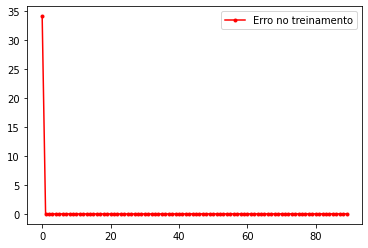

In [ ]:
draw_graphics(Log)

###**Predição**

#### Visualização do erro



In [ ]:
y_pred = neuralModel1.predict(X_test)
r2 = r2_score(y_test_new, y_pred)
mae = median_absolute_error(y_test_new, y_pred)

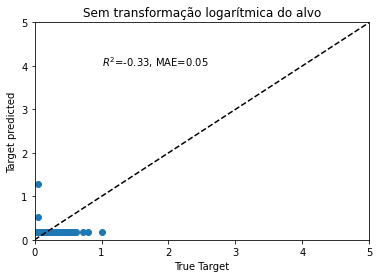

In [ ]:
scatter_chart(y_test_new, y_pred, r2, mae)

# Treinamento da Rede Neural usando Logarítmo

In [ ]:
neuralModel2 = compileNeuralModel(neuralModel2)
Log = trainNeuralModel(neuralModel2, X_train, y_train_log)

Epoch 1/90
64/64 [==============================] - 0s 2ms/step - loss: 18.5947
Epoch 2/90
64/64 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 3/90
64/64 [==============================] - 0s 2ms/step - loss: 0.1434
Epoch 4/90
64/64 [==============================] - 0s 2ms/step - loss: 0.1098
Epoch 5/90
64/64 [==============================] - 0s 1ms/step - loss: 0.1059
Epoch 6/90
64/64 [==============================] - 0s 2ms/step - loss: 0.1098
Epoch 7/90
64/64 [==============================] - 0s 1ms/step - loss: 0.1009
Epoch 8/90
64/64 [==============================] - 0s 1ms/step - loss: 0.1028
Epoch 9/90
64/64 [==============================] - 0s 2ms/step - loss: 0.1109
Epoch 10/90
64/64 [==============================] - 0s 1ms/step - loss: 0.1041
Epoch 11/90
64/64 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 12/90
64/64 [==============================] - 0s 2ms/step - loss: 0.1103
Epoch 13/90
64/64 [=============================

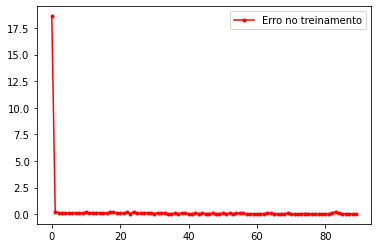

In [ ]:
draw_graphics(Log)

In [ ]:
pred = neuralModel2.predict(X_test)
pred
print(pred.max())
print(pred.min())

13.515551
7.065994


In [ ]:
#np.sum(np.isfinite(y_pred))
y_test_log = np.log1p(y_test)
print(y_test_log.max())
print(y_test_log.min())

SalePrice    13.534474
dtype: float64
SalePrice    10.471978
dtype: float64


In [ ]:
y_pred = np.expm1(pred)
r2 = r2_score(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

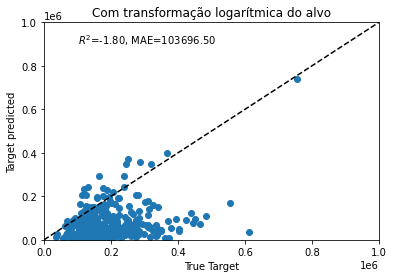

In [ ]:
scatter_chart_log(np.array(y_test), y_pred, r2, mae)

In [ ]:
download_file(result, "resultado3.csv")